# Conectando google collage al drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importando os, numpy, matplatlib y mpl_toolkits que son esenciales para la realización de estes ejercicio

In [2]:
import os
import numpy as np
from numpy import genfromtxt

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Extrayendo los datos del dataset
de los datos extraidos se eliminan los datos no numericos, y la columna 1 que es de valores nulos y la primera fila 0 encabezado de las columnas

In [3]:
data = genfromtxt('/content/drive/MyDrive/IA/dataset/Diamonds Prices2022.csv',delimiter=',')
X = data[:, :11]
X = np.delete(X, 0, axis=0)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 3, axis=1)
y = data[:, 7]
y = np.delete(y, 0, axis=0)
m = y.size

m = y.size
print(m)
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>12s}{:>12s}{:>14s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'y'))
print('-'*26)
for i in range(10):
  print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:12.0f}{:12.0f}{:14.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5],  y[i]))

53943
  X[:,0] X[:, 1]   X[:, 2]   X[:, 3]     X[:, 4]     X[:, 5]             y
--------------------------
       1      62        55         4           4           2           326
       2      60        61         4           4           2           326
       3      57        65         4           4           2           327
       4      62        58         4           4           3           334
       5      63        58         4           4           3           335
       6      63        57         4           4           2           336
       7      62        57         4           4           2           336
       8      62        55         4           4           3           337
       9      65        61         4           4           2           337
      10      59        61         4           4           2           338


# graficando

In [4]:
def plotData(x, y):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=1, mec='k')
    pyplot.ylabel('precio')
    pyplot.xlabel('datos del dimante')

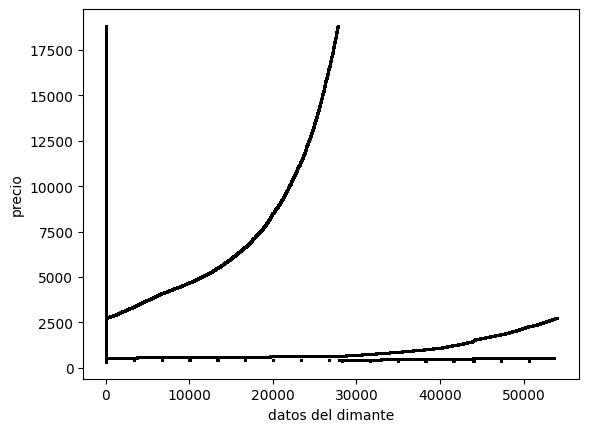

In [5]:
plotData(X, y)

In [6]:
print(X)

[[1.0000e+00 6.1500e+01 5.5000e+01 3.9500e+00 3.9800e+00 2.4300e+00]
 [2.0000e+00 5.9800e+01 6.1000e+01 3.8900e+00 3.8400e+00 2.3100e+00]
 [3.0000e+00 5.6900e+01 6.5000e+01 4.0500e+00 4.0700e+00 2.3100e+00]
 ...
 [5.3941e+04 6.0500e+01 5.5000e+01 5.7900e+00 5.7400e+00 3.4900e+00]
 [5.3942e+04 5.9800e+01 6.2000e+01 5.7400e+00 5.7300e+00 3.4300e+00]
 [5.3943e+04 6.0500e+01 5.9000e+01 5.7100e+00 5.7600e+00 3.4700e+00]]


# Descenso por el gradiente
$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$
se realizan las def featurenormlize computecostmult y gradientdescentmulti para poder calcular los datos

In [7]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [8]:
X_norm, mu, sigma = featureNormalize(X)
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.0000e+00 6.1500e+01 5.5000e+01 3.9500e+00 3.9800e+00 2.4300e+00]
 [2.0000e+00 5.9800e+01 6.1000e+01 3.8900e+00 3.8400e+00 2.3100e+00]
 [3.0000e+00 5.6900e+01 6.5000e+01 4.0500e+00 4.0700e+00 2.3100e+00]
 ...
 [5.3941e+04 6.0500e+01 5.5000e+01 5.7900e+00 5.7400e+00 3.4900e+00]
 [5.3942e+04 5.9800e+01 6.2000e+01 5.7400e+00 5.7300e+00 3.4300e+00]
 [5.3943e+04 6.0500e+01 5.9000e+01 5.7100e+00 5.7600e+00 3.4700e+00]]
Media calculada: [2.69720000e+04 6.17493224e+01 5.74572512e+01 5.73115807e+00
 5.73452644e+00 3.53872958e+00]
Desviación estandar calculada: [1.55720028e+04 1.43261299e+00 2.23452824e+00 1.12171919e+00
 1.14209233e+00 7.05672930e-01]
[[-1.7320187  -0.17403335 -1.09967336 -1.58788233 -1.5362387  -1.57116638]
 [-1.73195448 -1.36067623  1.58545717 -1.64137165 -1.65882074 -1.74121683]
 [-1.73189026 -3.38494937  3.37554419 -1.49873345 -1.45743597 -1.74121683]
 ...
 [ 1.73189026 -0.87205857 -1.09967336  0.05245691  0.00479257 -0.06905407]
 [ 1.73195448 -1.36067623  2.03297893  0.

In [9]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [10]:
print(X)

[[ 1.         -1.7320187  -0.17403335 ... -1.58788233 -1.5362387
  -1.57116638]
 [ 1.         -1.73195448 -1.36067623 ... -1.64137165 -1.65882074
  -1.74121683]
 [ 1.         -1.73189026 -3.38494937 ... -1.49873345 -1.45743597
  -1.74121683]
 ...
 [ 1.          1.73189026 -0.87205857 ...  0.05245691  0.00479257
  -0.06905407]
 [ 1.          1.73195448 -1.36067623 ...  0.00788248 -0.00396329
  -0.15407929]
 [ 1.          1.7320187  -0.87205857 ... -0.01886218  0.02230429
  -0.09739581]]


In [11]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [12]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### Seleccionando coheficientes de aprendizaje
Se decide la cantidad de interacciones a usar y el coeficiente alpha en este caso se uso 10000 interacciones y alpha 000.1

theta calculado por el descenso por el gradiente: [3932.73429361  235.72974115  -57.73614692 -171.298792   2488.1768867
  624.26905147  559.97679904]
El precio predecido para (usando el descenso por el gradiente): Z:5320


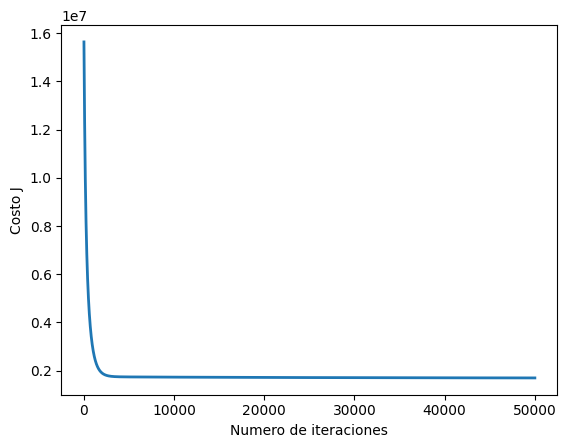

In [14]:
alpha = 0.001
num_iters = 50000
theta = np.zeros(7)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1,53934,62,59,6,6,4]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

# 1° corrida

In [15]:
X_array = [0.1,53934,62,59,6,6,4]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:1781


# 2° corrida

In [16]:
X_array = [0.2,53935,62.7,59,5.69,5.73,3.58]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:977


# 3° corrida

In [17]:
X_array = [0.3,53936,60.8,57,5.75,5.76,3.5]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:1686


# 4° corrida


In [18]:
X_array = [0.4,53937,63.1,55,5.69,5.75,3.61]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:2089


# 5° corrida

In [19]:
X_array = [0.5,53938,62.8,60,5.66,5.68,3.56]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:1967


# 6° corrida

In [20]:
X_array = [0.6,53936,60.8,57,5.75,5.76,3.5]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:2866


# 7° corrida

In [21]:
X_array = [0.7,53939,61,58,6.15,6.12,3.74]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:4449


# 8° corrida

In [22]:
X_array = [0.8,53940,62.2,55,5.83,5.87,3.64]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:4098


# 9° corrida

In [23]:
X_array = [0.9,53941,60.5,55,5.79,5.74,3.49]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:4281


# 10° corrida

In [24]:
X_array = [0.21,53942,59.8,62,5.74,5.73,3.43]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:895


los valores con este metodo son medianamente cercanos con algunos valores y un poco lejanos con otros valores

# Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [48]:
data = genfromtxt('/content/drive/MyDrive/IA/dataset/Diamonds Prices2022.csv',delimiter=',')
X = data[:, :11]
X = np.delete(X, 0, axis=0)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 3, axis=1)
y = data[:, 7]
y = np.delete(y, 0, axis=0)
m = y.size

m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

53943


In [49]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [50]:

theta = normalEqn(X, y);
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

X_array = [0.1,53934,62,59,6,6,4]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-1.05250576e+04  1.55808483e-02 -9.36144836e-01 -8.05283725e+01
  2.99874063e+03  2.10020092e+02  9.37251798e+01]
El precio predecido para (usando el descenso por el gradiente): Z:14606


# 1° corrida

In [52]:
X_array = [0.1,53934,62,59,6,6,4]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:14606


# 2° corrida

In [53]:
theta = normalEqn(X, y);
X_array = [0.2,53935,62.7,59,5.69,5.73,3.58]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:12527


# 3° corrida

In [54]:
X_array = [0.3,53936,60.8,57,5.75,5.76,3.5]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:11816


# 4° corrida

In [55]:
X_array = [0.4,53937,63.1,55,5.69,5.75,3.61]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:10751


# 5° corrida

In [56]:
X_array = [0.5,53938,62.8,60,5.66,5.68,3.56]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:9187


# 6° corrida

In [57]:
X_array = [0.6,53936,60.8,57,5.75,5.76,3.5]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:8659


# 7° corrida

In [58]:
X_array = [0.7,53939,61,58,6.15,6.12,3.74]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:8823


# 8° corrida

In [59]:
X_array = [0.8,53940,62.2,55,5.83,5.87,3.64]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:6990


# 9° corrida

In [60]:
X_array = [0.9,53941,60.5,55,5.79,5.74,3.49]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:5778


# 10° corrida

In [61]:
X_array = [0.21,53942,59.8,62,5.74,5.73,3.43]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:12319


los valores con el metodo que se optienen con la ecuacion normal son muy lejanos

# Regresión polinomica

In [62]:
data = genfromtxt('/content/drive/MyDrive/IA/dataset/Diamonds Prices2022.csv',delimiter=',')
X = data[:, :11]
X = np.delete(X, 0, axis=0)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 3, axis=1)
X  = np.delete(X , 0, axis=1)
X  = np.delete(X , 0, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
y = data[:, 7]
y = np.delete(y, 0, axis=0)
m = y.size

m = y.size
print(m)
print('{:>8s}{:>8s}'.format('X[:,0]', 'y'))
print('-'*80)
for i in range(10):
  print('{:8.0f}{:8.0f}'.format(X[i, 0], y[i]))

53943
  X[:,0]       y
--------------------------------------------------------------------------------
      55     326
      61     326
      65     327
      58     334
      58     335
      57     336
      57     336
      55     337
      61     337
      61     338


In [63]:
X = np.concatenate([X, X * X], axis=1)

In [64]:
print(X)

[[  55. 3025.]
 [  61. 3721.]
 [  65. 4225.]
 ...
 [  55. 3025.]
 [  62. 3844.]
 [  59. 3481.]]


In [65]:
X_norm, mu, sigma = featureNormalize(X)

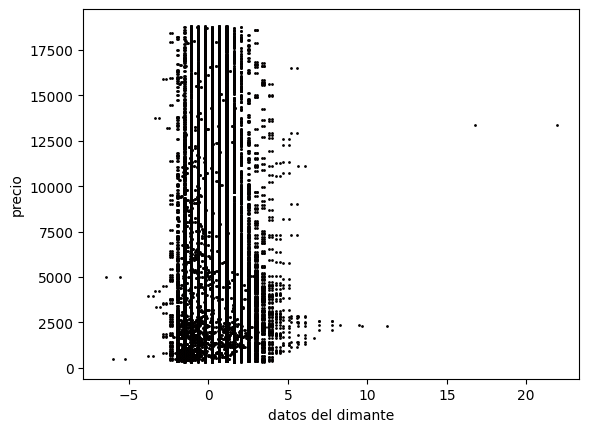

In [66]:
plotData(X_norm, y)

In [67]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [68]:
print(X)

[[ 1.         -1.09967336 -1.07806436]
 [ 1.          1.58545717  1.58903803]
 [ 1.          3.37554419  3.52038804]
 ...
 [ 1.         -1.09967336 -1.07806436]
 [ 1.          2.03297893  2.0603794 ]
 [ 1.          0.69041366  0.66934755]]


## Seleccionando coheficientes de aprendizaje

theta calculado por el descenso por el gradiente: [3932.73429361  443.55506375   59.83759765]
La capacidad adquisitiva para una persona de 33 (usando el descenso por el gradiente): $4113


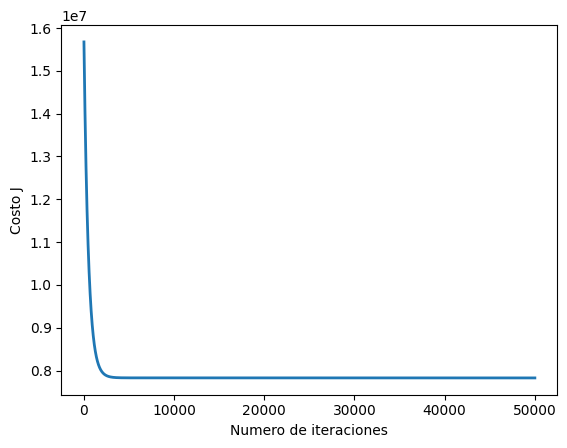

In [70]:
alpha = 0.001
num_iters = 50000
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1, 59,2757]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)

print('prediccion de precio de diamante se 60 (usando el descenso por el gradiente): ${:.0f}'.format(price))

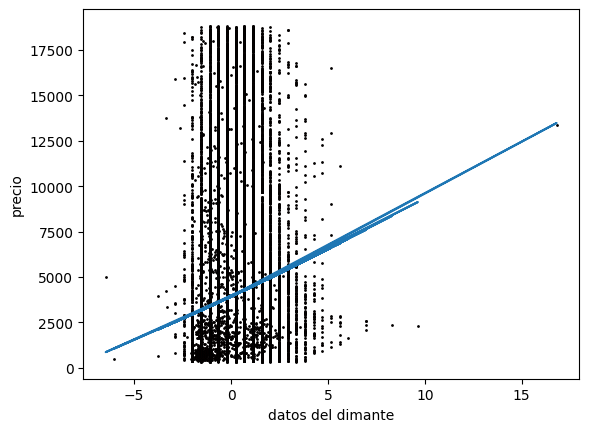

In [45]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

# 1° corrida

In [78]:
X_array = [0.7, 59,2757]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

2933.189223683248


# 2° corrida

In [80]:
X_array = [0.5, 60,2757]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

2345.1429055223975


# 3° corrida

In [81]:
X_array = [0.5, 55,2756]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1352.4109024335908


# 4° corrida

In [82]:
X_array = [0.5, 58,2756]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1947.9125241147303


# 5° corrida

In [83]:
X_array = [0.5, 56,2756]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1550.9114429939707


# 6° corrida

In [84]:
X_array = [0.5, 60,2755]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

2344.684304948583


# 7° corrida

In [85]:
X_array = [0.5, 55,2753]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1351.723001572869


# 8° corrida

In [88]:
X_array = [0.8, 52,2745]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1934.207265678317


# 9° corrida

In [89]:
X_array = [0.4, 59,2755]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1752.9103350275877


# 10° corrida

In [90]:
X_array = [0.5, 62,2756]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

2741.91468635625


los valores son mas cercanos que con los otros metodos anteriores